In [33]:
from pandas import read_csv, DataFrame

data = read_csv("Data/train.csv")

In [34]:
# Features
features = data.columns.tolist()

if "Id" in features:
    features.remove("Id")
    
if "SalePrice" in features:
    features.remove("SalePrice")

features

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [35]:
##

# Features by dtype

features
features_by_dtype = {}

for feature in features:
    
    feature_dtype = str(data.dtypes[feature])
    
    try:
        features_by_dtype[feature_dtype]
    except KeyError:
        features_by_dtype[feature_dtype] = []
        
    
    features_by_dtype[feature_dtype].append(feature)

dtypes = features_by_dtype.keys()

##

In [36]:
dtypes

dict_keys(['int64', 'object', 'float64'])

In [37]:
features_by_dtype

{'int64': ['MSSubClass',
  'LotArea',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'BsmtFinSF1',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'TotRmsAbvGrd',
  'Fireplaces',
  'GarageCars',
  'GarageArea',
  'WoodDeckSF',
  'OpenPorchSF',
  'EnclosedPorch',
  '3SsnPorch',
  'ScreenPorch',
  'PoolArea',
  'MiscVal',
  'MoSold',
  'YrSold'],
 'object': ['MSZoning',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical'

In [38]:
# Categorical Features

categorical_features = features_by_dtype["object"]
categorical_features = categorical_features + ["MSSubClass"]

categorical_features

# Binary Features

binary_features = [c for c in categorical_features if len(data[c].unique()) == 2]

binary_features

['Street', 'Utilities', 'CentralAir']

In [39]:
# Numerical Features

float_features = features_by_dtype["float64"]
int_features = features_by_dtype["int64"]
numerical_features = float_features + int_features
remove_list = ["GarageYrBlt", "YearBuilt", "YearRemodAdd", "MoSold", "YrSold", "MSSubClass"]
numerical_features = [n for n in numerical_features if n not in remove_list]

numerical_features

['LotFrontage',
 'MasVnrArea',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [40]:
# Has Zero Features

has_zero_features = []

for n in numerical_features:
    if 0 in data[n].unique():
        has_zero_features.append(n)
        
has_zero_features

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [41]:
# Bounded Features

bounded_features = ["OverallQual", "OverallCond"]

# Temporal Features

temporal_features = remove_list.copy()
temporal_features.remove("MSSubClass")

temporal_features

['GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'MoSold', 'YrSold']

In [42]:
# Summary

features
categorical_features, numerical_features, temporal_features
binary_features, has_zero_features, bounded_features

pass

In [43]:
data = data[categorical_features + ["SalePrice"]]
data = data.fillna("Unknown")
data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass,SalePrice
0,RL,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal,60,208500
1,RL,Pave,Unknown,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal,20,181500
2,RL,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal,60,223500
3,RL,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,Unknown,Unknown,Unknown,WD,Abnorml,70,140000
4,RL,Pave,Unknown,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal,60,250000
5,RL,Pave,Unknown,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,TA,TA,Y,Unknown,MnPrv,Shed,WD,Normal,50,143000
6,RL,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,...,TA,TA,Y,Unknown,Unknown,Unknown,WD,Normal,20,307000
7,RL,Pave,Unknown,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,...,TA,TA,Y,Unknown,Unknown,Shed,WD,Normal,60,200000
8,RM,Pave,Unknown,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,...,Fa,TA,Y,Unknown,Unknown,Unknown,WD,Abnorml,50,129900
9,RL,Pave,Unknown,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,...,Gd,TA,Y,Unknown,Unknown,Unknown,WD,Normal,190,118000


## All sub-classes within each categorical variable are statistically significant.

In [45]:
from scipy.stats import chisquare

temp = {}

for c in categorical_features:
    unit = data.groupby(c).count()["SalePrice"]
    temp[c] = chisquare(unit)
    
chisquare_dataframe = DataFrame(data=temp, index=["chi-square test statistic", "p-value"])
#chisquare_dataframe.round(2).T
chisquare_dataframe


,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,MiscFeature,Neighborhood,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,Utilities
chi-square test statistic,2399.606849,3700.650685,4452.136986,1928.513699,7.189274e+02,6142.469863,1.349452e+03,1.104726e+03,8388.934247,9981.512329,...,5318.239726,1.034521e+03,2248.082192,4324.180822,9808.723288,4227.753425,4546.534247,8539.752055,1436.09863,1456.00274
p-value,0.000000,0.000000,0.000000,0.000000,5.007208e-152,0.000000,6.309285e-291,3.102499e-242,0.000000,0.000000,...,0.000000,4.127420e-203,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000


## A Table of p-values from Chi-square Two Way Tests

In [46]:
p_value_table = DataFrame(index = categorical_features, columns = categorical_features)

from scipy.stats import chi2_contingency
from pandas import crosstab

def is_statistically_significant(p):
        
    if p < 0.05:
        return 1
    else:
        return 0

duplicate = []
for c in categorical_features:
    
    duplicate.append(c)
    
    for cc in categorical_features:
        if not c == cc: # and cc not in duplicate:
            crosstable = crosstab(data[c], data[cc])
            chi2, p, dof, expected = chi2_contingency(crosstable)
            p_value_table[c][cc] = is_statistically_significant(p)

In [47]:
p_value_table

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,MSSubClass
MSZoning,NaN,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,0,0,1,1,1
Street,1,NaN,0,0,1,1,0,1,1,1,...,0,0,0,0,0,0,1,1,1,1
Alley,1,0,NaN,1,1,0,0,0,1,1,...,1,1,1,1,0,0,0,0,1,1
LotShape,1,0,1,NaN,1,0,1,1,1,1,...,1,1,1,1,1,0,0,0,0,1
LandContour,1,1,1,1,NaN,0,1,1,1,0,...,1,0,0,1,0,0,0,0,1,1
Utilities,0,1,0,0,0,NaN,1,0,1,0,...,0,0,0,0,0,0,0,1,1,0
LotConfig,1,0,0,1,1,1,NaN,1,1,1,...,0,0,1,0,0,0,0,0,0,1
LandSlope,1,1,0,1,1,0,1,NaN,1,0,...,0,0,0,0,0,0,0,0,0,1
Neighborhood,1,1,1,1,1,1,1,1,NaN,1,...,1,1,1,1,0,1,0,1,1,1
Condition1,1,1,1,1,0,0,1,0,1,NaN,...,1,0,0,1,1,0,1,0,0,1


 - 1 means statistically significant (p < 0.05) 
 - 0 means non-significant (p >= 0.05)

## Heatmap of Statistically Significant vs Non-significant Categorical x Categorical Relationships

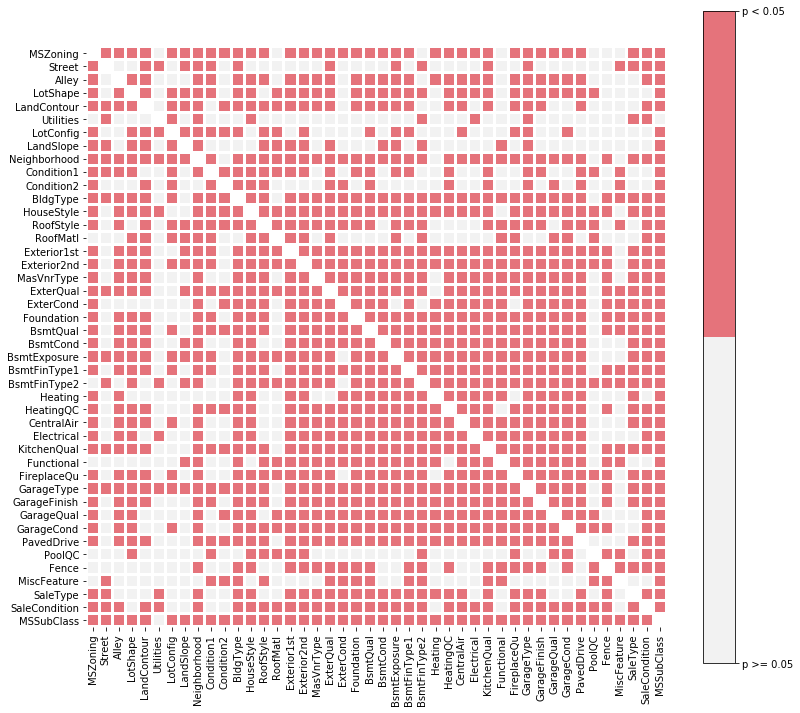

In [48]:
from seaborn import heatmap
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from numpy import float32
%matplotlib inline
plt.figure(figsize=(13,12))

p = sns.diverging_palette(10, 220, sep=80, n=10)
myColors = [p[4], p[1]]
cmap = colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

ax = heatmap(p_value_table.fillna(float32(None)), linewidths=2, cmap=cmap, cbar=False, square=True)
cbar = ax.figure.colorbar(ax.collections[0])
cbar.set_ticks([1, 0])
cbar.set_ticklabels(["p < 0.05", "p >= 0.05"])
plt.show()

## Number of categorical x categorical relationships that are statistically significant vs non-significant

In [49]:
p_value_data = {}

for c in categorical_features:
    
    p_value_data[c] = {}
    row = p_value_data[c]
    
    column_value_counter = p_value_table[c].value_counts()
    relationships_counter = len(categorical_features) - 1
    significant = 0
    nonsignificant = 0
    
    if not column_value_counter.empty:
        
        if 1 in column_value_counter.keys():
            
            significant += column_value_counter[1]
            
        if 0 in column_value_counter.keys():
            
            nonsignificant += column_value_counter[0]
        
        row["p < 0.05"] = significant
        row["p >= 0.05"] = nonsignificant
        row["Percentage of Relationships Significant"] = ("%.1f" % ((significant / relationships_counter) * 100)) + "%"
        
DataFrame(data = p_value_data).T.sort_values("p < 0.05", ascending=False)

,Percentage of Relationships Significant,p < 0.05,p >= 0.05
MSSubClass,97.7%,42,1
GarageType,93.0%,40,3
Neighborhood,90.7%,39,4
ExterQual,90.7%,39,4
BldgType,90.7%,39,4
Exterior2nd,90.7%,39,4
BsmtQual,88.4%,38,5
Exterior1st,88.4%,38,5
KitchenQual,88.4%,38,5
HouseStyle,88.4%,38,5
